In [1]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [30]:
data = torch.randn(100, 3)
target = data.sum(dim=1, keepdim=True) + 0.01 * torch.randn(data.shape[0], 1)

linear = nn.Linear(3, 1)
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr = 0.01)

target_pred = linear(data)

Text(0, 0.5, 'Ouputs')

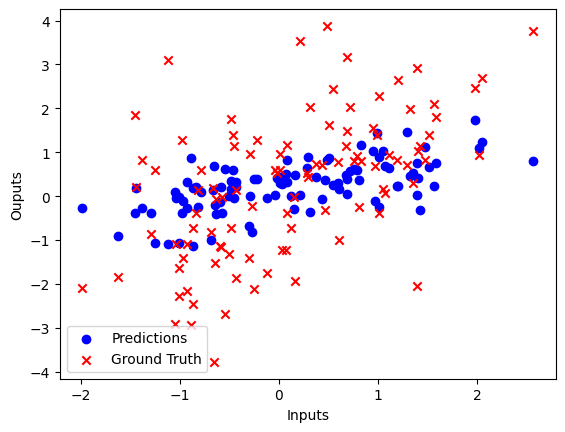

In [31]:
plt.scatter(data[:,0], target_pred.detach(), color = 'blue')
plt.scatter(data[:,0], target, marker = 'x', color = 'red')
plt.legend(['Predictions', 'Ground Truth'])
plt.xlabel('Inputs')
plt.ylabel('Ouputs')

In [32]:
loss_logger = []
epochs = 1000

for i in range(epochs):

    target_pred = linear(data)

    loss = loss_function(target_pred, target)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    loss_logger.append(loss.item())

    if i % 100 == 0:
        print(f"Epoch {i}, loss: {loss.item()}")

print(f"Epoch {1000}, loss: {loss.item()}")

Epoch 0, loss: 2.550032377243042
Epoch 100, loss: 0.07388554513454437
Epoch 200, loss: 0.00291829789057374
Epoch 300, loss: 0.00021337359794415534
Epoch 400, loss: 0.00010042774374596775
Epoch 500, loss: 9.556020813761279e-05
Epoch 600, loss: 9.534799755783752e-05
Epoch 700, loss: 9.533840056974441e-05
Epoch 800, loss: 9.533797128824517e-05
Epoch 900, loss: 9.533816046314314e-05
Epoch 1000, loss: 9.533820411888883e-05


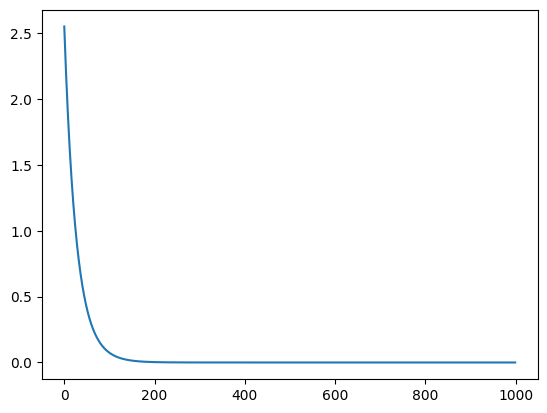

In [33]:
plt.plot(loss_logger)

Text(0, 0.5, 'Ouputs')

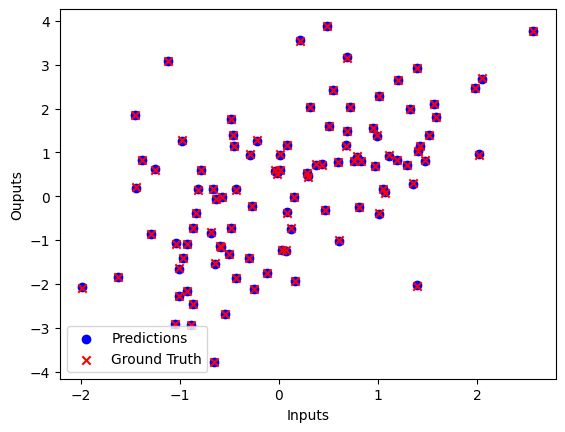

In [34]:
plt.scatter(data[:,0], target_pred.detach(), color = 'blue')
plt.scatter(data[:,0], target, marker = 'x', color = 'red')
plt.legend(['Predictions', 'Ground Truth'])
plt.xlabel('Inputs')
plt.ylabel('Ouputs')

In [ ]:
npzfile = np.load("data/toy_data_two_moon.npz")

train_X = torch.FloatTensor(npzfile["arr_0"])
train_y = torch.FloatTensor(npzfile["arr_2"])

test_X = torch.FloatTensor(npzfile["arr_1"])
test_y = torch.FloatTensor(npzfile["arr_3"])


Text(0.5, 1.0, 'Test data')

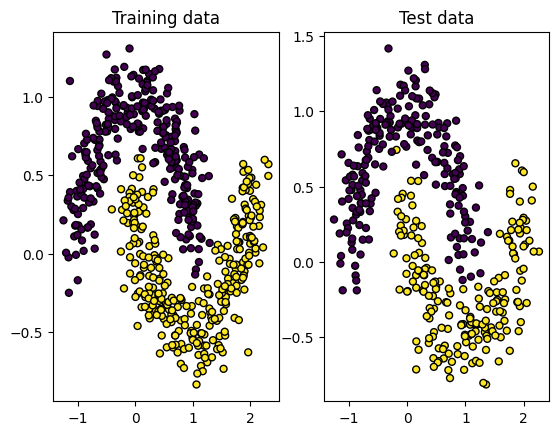

In [36]:
plt.subplot(121)
plt.scatter(train_X[:,0], train_X[:,1], c=train_y[:,0], s=25, marker='o', edgecolors='k')
plt.title("Training data")
plt.subplot(122)
plt.scatter(test_X[:,0], test_X[:,1], c=test_y[:,0], s=25, marker='o', edgecolors='k')
plt.title("Test data")

In [37]:
linear = nn.Linear(2,1)
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

target_pred = linear(train_X)

In [39]:
epochs = 1000

accuracy_logger = []
loss_logger = []

for i in range(epochs):

    with torch.no_grad():
        y_test_hat = linear(test_X)
        class_pred = (y_test_hat > 0).float()
        accuracy_logger.append(float(sum(class_pred == test_y)) / float(test_y.shape[0]))
    
    y_train_hat = linear(train_X)
    loss = loss_function(y_train_hat, train_y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_logger.append(loss.item())

    if i % 100 == 0:
        print(f"Epoch {i}, loss: {loss.item()}", f"accuracy: {accuracy_logger[-1]}")

print(f"Epoch {1000}, loss: {loss_logger[-1]}", f"accuracy: {accuracy_logger[-1]}")

Epoch 0, loss: 0.09085919708013535 accuracy: 0.6375
Epoch 100, loss: 0.09082790464162827 accuracy: 0.6375
Epoch 200, loss: 0.0908115804195404 accuracy: 0.6375
Epoch 300, loss: 0.09080304950475693 accuracy: 0.6375
Epoch 400, loss: 0.09079859405755997 accuracy: 0.64
Epoch 500, loss: 0.09079627692699432 accuracy: 0.64
Epoch 600, loss: 0.09079506248235703 accuracy: 0.6375
Epoch 700, loss: 0.09079442173242569 accuracy: 0.6375
Epoch 800, loss: 0.09079410135746002 accuracy: 0.6375
Epoch 900, loss: 0.0907939225435257 accuracy: 0.6375
Epoch 1000, loss: 0.09079383313655853 accuracy: 0.6375


In [40]:
linear = nn.Linear(2,1)
loss_function = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

target_pred = linear(train_X)

In [41]:
epochs = 1000

accuracy_logger = []
loss_logger = []

for i in range(epochs):

    with torch.no_grad():
        y_test_hat = linear(test_X)
        class_pred = (y_test_hat > 0).float()
        accuracy_logger.append(float(sum(class_pred == test_y)) / float(test_y.shape[0]))
    
    y_train_hat = linear(train_X)
    loss = loss_function(y_train_hat, train_y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_logger.append(loss.item())

    if i % 100 == 0:
        print(f"Epoch {i}, loss: {loss.item()}", f"accuracy: {accuracy_logger[-1]}")

print(f"Epoch {1000}, loss: {loss_logger[-1]}", f"accuracy: {accuracy_logger[-1]}")

Epoch 0, loss: 0.6468217968940735 accuracy: 0.58
Epoch 100, loss: 0.5982027053833008 accuracy: 0.6525
Epoch 200, loss: 0.560133695602417 accuracy: 0.7125
Epoch 300, loss: 0.5297239422798157 accuracy: 0.7475
Epoch 400, loss: 0.5049731135368347 accuracy: 0.7675
Epoch 500, loss: 0.4844769239425659 accuracy: 0.7825
Epoch 600, loss: 0.46723562479019165 accuracy: 0.7875
Epoch 700, loss: 0.4525260031223297 accuracy: 0.795
Epoch 800, loss: 0.43981659412384033 accuracy: 0.8
Epoch 900, loss: 0.42871102690696716 accuracy: 0.8075
Epoch 1000, loss: 0.4190016984939575 accuracy: 0.8075


Text(0, 0.5, 'Accuracy')

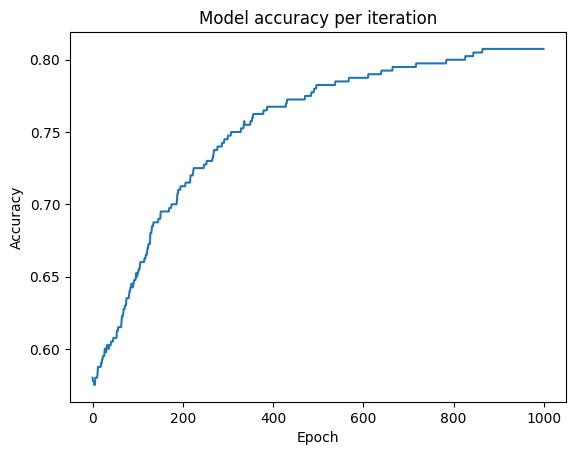

In [42]:
plt.plot(accuracy_logger)
plt.title("Model accuracy per iteration")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

Text(0.5, 0, 'BCE Loss')

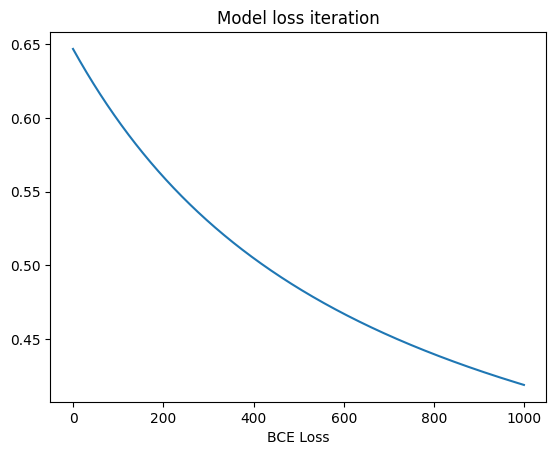

In [43]:
plt.plot(loss_logger)
plt.title("Model loss iteration")
plt.xlabel("Epoch") 
plt.xlabel("BCE Loss")